In [1]:
import pandas as pd
import numpy as  np
import pycaret

In [3]:
data = pd.read_csv('01_homely_resort_listing.csv')
data.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,Unnamed: 25,price
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,1,House,10.0,10.0,10.0,100.0,10.0,Private room,NaN,$300.00
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$99.00
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$100.00
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$100.00
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NaN,$599.00


In [5]:
data.shape

(5834, 27)

In [8]:
data.isna().sum()

accommodates                         0
amenities                            0
availability_30                      0
bathrooms                           46
bed_type                             0
bedrooms                             6
beds                                23
calculated_host_listings_count       0
cancellation_policy                  0
guests_included                      0
has_availability                     0
host_is_superhost                   15
host_listings_count                 15
instant_bookable                     0
latitude(North)                      0
longitude(East)                      0
maximum_nights                       0
number_of_reviews                    0
property_type                        0
review_scores_checkin             2057
review_scores_communication       2057
review_scores_location            2056
review_scores_rating              2046
review_scores_value               2057
room_type                            0
Unnamed: 25              

In [24]:
data['price'] = data['price'].replace('[^\d.]','',regex=True)

In [30]:
data = data.drop(columns='Unnamed: 25')

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room,300.00
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,7,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room,99.00
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,100.00
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,100.00
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt,599.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,3,moderate,1,...,1125,13,Apartment,10.0,10.0,10.0,88.0,10.0,Entire home/apt,125.00
5830,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",15,1.0,Real Bed,1.0,2.0,11,strict,3,...,1125,9,Apartment,10.0,10.0,10.0,100.0,9.0,Entire home/apt,179.00
5831,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",11,1.0,Real Bed,1.0,2.0,2,moderate,1,...,1125,0,Condominium,NaN,NaN,NaN,NaN,NaN,Private room,85.00
5832,1,{},30,1.0,Real Bed,1.0,1.0,1,flexible,1,...,1125,0,Apartment,NaN,NaN,NaN,NaN,NaN,Shared room,25.00


Text(0.5, 1.0, 'Distribution of Room')

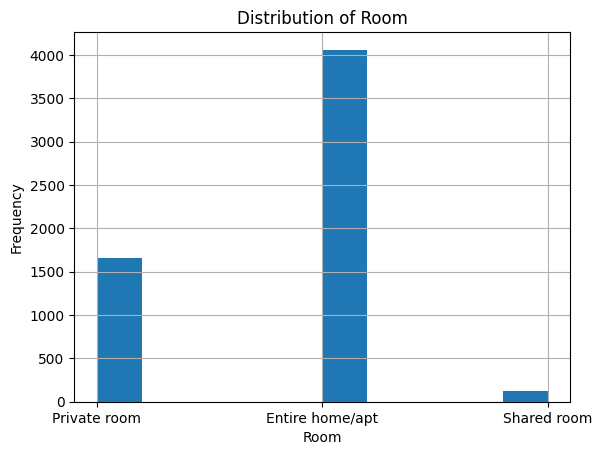

In [31]:
data['room_type'].hist()

# add labels and title
plt.xlabel('Room')
plt.ylabel('Frequency')
plt.title('Distribution of Room')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


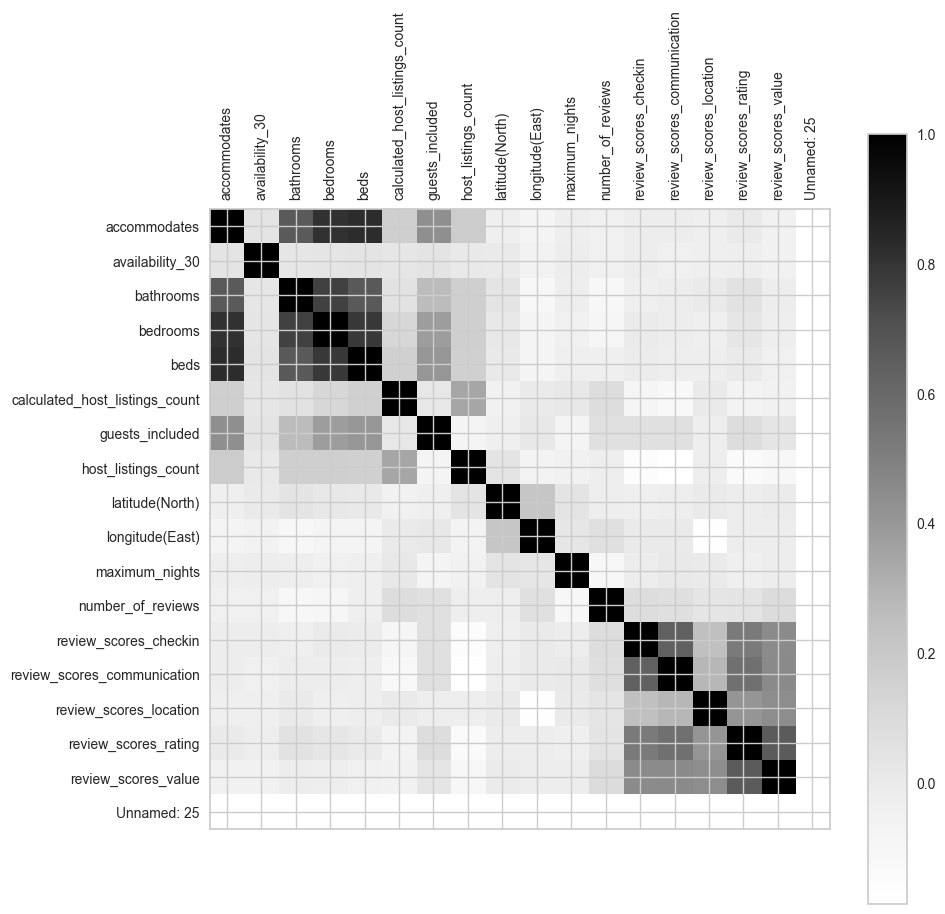

In [37]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(data)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    5834 non-null   int64  
 1   amenities                       5834 non-null   object 
 2   availability_30                 5834 non-null   int64  
 3   bathrooms                       5788 non-null   float64
 4   bed_type                        5834 non-null   object 
 5   bedrooms                        5828 non-null   float64
 6   beds                            5811 non-null   float64
 7   calculated_host_listings_count  5834 non-null   int64  
 8   cancellation_policy             5834 non-null   object 
 9   guests_included                 5834 non-null   int64  
 10  has_availability                5834 non-null   object 
 11  host_is_superhost               5819 non-null   object 
 12  host_listings_count             58

In [32]:
from pycaret.regression import *
s = setup(data, target='price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(5834, 27)"
4,Transformed data shape,"(5834, 53)"
5,Transformed train set shape,"(4083, 53)"
6,Transformed test set shape,"(1751, 53)"
7,Ordinal features,2
8,Numeric features,18
9,Categorical features,8


In [38]:
best = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]